In [ ]:
import sklearn

In [ ]:
from sklearn.datasets import make_circles

In [ ]:
n_samples=2500
X, y=make_circles(n_samples,
                  noise=0.04,
                  random_state=13)

In [ ]:
len(X)

2500

In [ ]:
X[:10]

array([[-0.67311409, -0.73794342],
       [-0.78256228,  0.03649181],
       [-0.54578184, -0.81564176],
       [-0.90647053, -0.43604953],
       [ 0.0749915 , -1.03619747],
       [ 0.95928808,  0.36442033],
       [-0.90325375, -0.19378161],
       [-0.44285759,  0.86805024],
       [ 0.71355322, -0.22583218],
       [ 0.53174191,  0.56922623]])

In [ ]:
y[:10]

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1])

In [ ]:
#make dataframe of circle data
import pandas as pd
circles=pd.DataFrame({'X1' : X[:, 0],
                      'X2' : X[:, 1],
                      'label': y})

circles.head()

,X1,X2,label
0,-0.673114,-0.737943,0
1,-0.782562,0.036492,1
2,-0.545782,-0.815642,0
3,-0.906471,-0.436050,0
4,0.074992,-1.036197,0


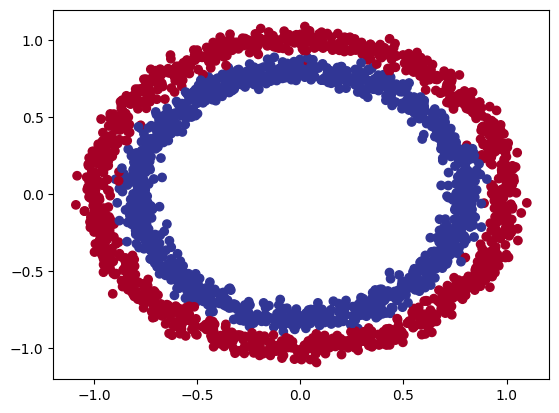

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu);

In [ ]:
X.shape, y.shape

((2500, 2), (2500,))

In [ ]:
#turn data into tensors
import torch as tr

X=tr.from_numpy(X).type(tr.float32)

y=tr.from_numpy(y).type(tr.float32)




In [ ]:
X[:5], y[:5]

(tensor([[-0.6731, -0.7379],
         [-0.7826,  0.0365],
         [-0.5458, -0.8156],
         [-0.9065, -0.4360],
         [ 0.0750, -1.0362]]),
 tensor([0., 1., 0., 0., 0.]))

In [ ]:
#split data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X,
                                                   y,
                                                   test_size=0.2,
                                                   random_state=42)

In [ ]:
len(X_train), len(X_test)

(2000, 500)

In [ ]:
#Building model

#Building a model to classify red and blue dots of circles

import torch as tr
from torch import nn
device='cuda' if tr.cuda.is_available() else 'cpu'
device

'cuda'

In [ ]:
X_train.shape, y_train.shape

(torch.Size([2000, 2]), torch.Size([2000]))

In [ ]:
#construct a model

class circlemodelv0(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1=nn.Linear(in_features=2, out_features=128)
    self.layer2=nn.ELU()
    self.layer3=nn.Linear(in_features=128, out_features=512)
    self.layer4=nn.ELU()
    self.layer5=nn.Linear(in_features=512, out_features=128)
    self.layer6=nn.ELU()
    self.layer7=nn.Linear(in_features=128, out_features=1)

  def forward(self, x):
    return self.layer7(self.layer6(self.layer5(self.layer4(self.layer3(self.layer2(self.layer1(x)))))))

In [ ]:
model0=circlemodelv0().to(device)

model0


circlemodelv0(
  (layer1): Linear(in_features=2, out_features=128, bias=True)
  (layer2): ELU(alpha=1.0)
  (layer3): Linear(in_features=128, out_features=512, bias=True)
  (layer4): ELU(alpha=1.0)
  (layer5): Linear(in_features=512, out_features=128, bias=True)
  (layer6): ELU(alpha=1.0)
  (layer7): Linear(in_features=128, out_features=1, bias=True)
)

In [ ]:
next(model0.parameters()).device

device(type='cuda', index=0)

In [ ]:
'''
model0= nn.Sequential(
    nn.Linear(in_features = 2 , out_features = 100),
    nn.Linear(in_features = 100 , out_features = 1)
).to(device)

model0
'''

'\nmodel0= nn.Sequential(\n    nn.Linear(in_features = 2 , out_features = 100),\n    nn.Linear(in_features = 100 , out_features = 1)\n).to(device)\n\nmodel0\n'

In [ ]:
model0.state_dict()

OrderedDict([('layer1.weight',
              tensor([[-0.5773, -0.0292],
                      [ 0.4392, -0.6857],
                      [-0.6855,  0.1465],
                      [-0.3793,  0.5138],
                      [ 0.6871, -0.4278],
                      [-0.5897, -0.1056],
                      [ 0.5867, -0.0284],
                      [ 0.0492, -0.3260],
                      [-0.3493, -0.2277],
                      [ 0.4761, -0.5248],
                      [ 0.6638, -0.0714],
                      [-0.1371,  0.4529],
                      [ 0.6777, -0.2435],
                      [-0.1307,  0.3219],
                      [-0.0698, -0.3771],
                      [-0.6490, -0.3618],
                      [ 0.1523,  0.4629],
                      [ 0.6799, -0.3237],
                      [-0.1277, -0.2825],
                      [ 0.3301, -0.4829],
                      [ 0.6620, -0.6302],
                      [ 0.3990, -0.1255],
                      [ 0.3736,  0.4630],
   

In [ ]:
 #untrained predictions
with tr.inference_mode():
  untrained_preds=model0(X_test.to(device))

print(len(untrained_preds), untrained_preds.shape)

print(len(X_test), X_test.shape)

print(untrained_preds[:10])
print(y_test[:10])

500 torch.Size([500, 1])
500 torch.Size([500, 2])
tensor([[ 0.0413],
        [ 0.0096],
        [ 0.0355],
        [ 0.0391],
        [ 0.0309],
        [ 0.0735],
        [ 0.0694],
        [-0.0020],
        [ 0.0662],
        [ 0.0210]], device='cuda:0')
tensor([1., 0., 1., 0., 0., 1., 0., 1., 0., 1.])


In [ ]:
#loss function and optimizer setup

#loss using will be Binary Cross Entropy

loss_fn=nn.BCEWithLogitsLoss()  #inbuilt sigmoid activation function

optimizer=tr.optim.SGD(params=model0.parameters(),
                       lr=0.001)


In [ ]:
#finding accuracy

def accuracy_fn(y_true, y_pred):
  correct=tr.eq(y_true, y_pred).sum().item()

  acc = (correct/len(y_pred)) * 100
  return acc


In [ ]:
#logits are raw outputs. --> model prediction probabilities by passing through activation function --> prediction labels by rounding off or, aking argmax()

model0.eval()
with tr.inference_mode():
  y_logits=model0(X_test.to(device))[:5]

y_logits

tensor([[0.0413],
        [0.0096],
        [0.0355],
        [0.0391],
        [0.0309]], device='cuda:0')

In [ ]:
y_test[:5]

tensor([1., 0., 1., 0., 0.])

In [ ]:
#use sigmoid function to convert to model predictions
y_pred_probs = tr.sigmoid(y_logits)

y_pred_probs

tensor([[0.5103],
        [0.5024],
        [0.5089],
        [0.5098],
        [0.5077]], device='cuda:0')

In [ ]:
y_preds=tr.round(y_pred_probs)
y_preds

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.]], device='cuda:0')

In [ ]:
y_pred_labels=tr.round(tr.sigmoid(model0(X_test.to(device))[:5]))
y_pred_labels

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.]], device='cuda:0', grad_fn=<RoundBackward0>)

In [ ]:
print(tr.eq(y_pred_labels.squeeze() , y_preds.squeeze()))


tensor([True, True, True, True, True], device='cuda:0')


In [ ]:
#building training and testing loop
tr.manual_seed(13)

epochs = 20000

X_train, y_train = X_train.to(device) , y_train.to(device)

X_test, y_test = X_test.to(device) , y_test.to(device)

for epoch in range(epochs):
  model0.train

  y_logits = model0(X_train).squeeze()
  y_pred= tr.round(tr.sigmoid(y_logits))

  loss= loss_fn(y_logits,  #nn.BCEWithLogitsLoss expects raw logits as inputs,
                y_train)   #nn.BCELoss expects prediction probabilities as inputs, tr.sigmoid(y_logits)

  accuracy=accuracy_fn(y_true = y_train,
                       y_pred = y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model0.eval()
  with tr.inference_mode():
    test_logits= model0(X_test).squeeze()
    test_pred=tr.round(tr.sigmoid(test_logits))

    test_loss=loss_fn(test_logits,
                      y_test)

    test_accuracy=accuracy_fn(y_true = y_test,
                              y_pred = test_pred)

  if epoch % 1000==0:
    print(f'epochs:{epoch} , Loss;{loss:.6f} , Accuracy : {accuracy:.2f}% , Test Loss:{test_loss:.5f} , Test Accuracy : {test_accuracy:.2f}%')

epochs:0 , Loss;0.693844 , Accuracy : 55.95% , Test Loss:0.69166 , Test Accuracy : 58.00%
epochs:1000 , Loss;0.692206 , Accuracy : 66.45% , Test Loss:0.69187 , Test Accuracy : 68.60%
epochs:2000 , Loss;0.690889 , Accuracy : 61.65% , Test Loss:0.69113 , Test Accuracy : 59.20%
epochs:3000 , Loss;0.689583 , Accuracy : 60.05% , Test Loss:0.69006 , Test Accuracy : 56.80%
epochs:4000 , Loss;0.688230 , Accuracy : 61.75% , Test Loss:0.68880 , Test Accuracy : 59.00%
epochs:5000 , Loss;0.686801 , Accuracy : 64.85% , Test Loss:0.68738 , Test Accuracy : 62.20%
epochs:6000 , Loss;0.685267 , Accuracy : 69.55% , Test Loss:0.68582 , Test Accuracy : 67.80%
epochs:7000 , Loss;0.683602 , Accuracy : 74.55% , Test Loss:0.68410 , Test Accuracy : 74.00%
epochs:8000 , Loss;0.681774 , Accuracy : 79.05% , Test Loss:0.68221 , Test Accuracy : 77.40%
epochs:9000 , Loss;0.679750 , Accuracy : 82.15% , Test Loss:0.68011 , Test Accuracy : 80.00%
epochs:10000 , Loss;0.677490 , Accuracy : 84.40% , Test Loss:0.67775 , Te